# 7.1 Entanglement with Qiskit

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


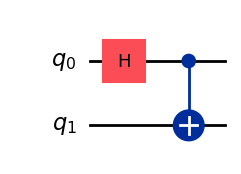

In [1]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector

qc = QuantumCircuit(2)

qc.h(0)
qc.cx(0, 1)

state = Statevector(qc)

print(state)

qc.draw("mpl")

# 7.2 Measuring entanglement

['00']


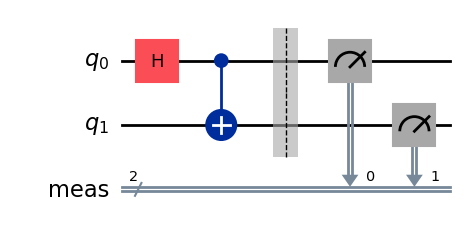

In [2]:
from qiskit import QuantumCircuit
from qiskit.primitives import StatevectorSampler

qc = QuantumCircuit(2)

qc.h(0)
qc.cx(0, 1)

qc.measure_all()

sampler = StatevectorSampler()

job = sampler.run([qc], shots=1)

result = job.result()[0]

print(result.data.meas.get_bitstrings())

qc.draw("mpl")

# 7.3 Statistics with Qiskit

{'00': 0.485, '11': 0.515}


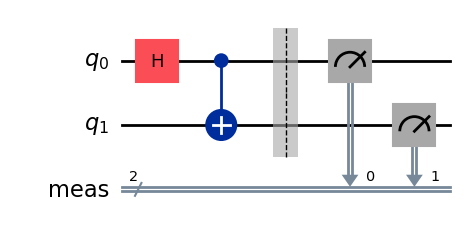

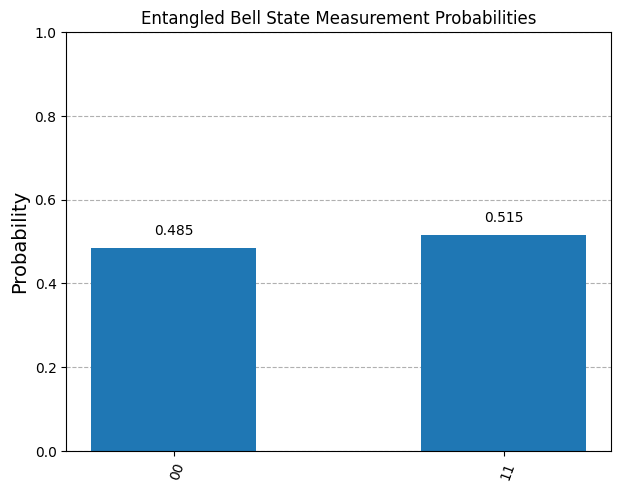

In [3]:
%matplotlib inline

from qiskit import QuantumCircuit
from qiskit.primitives import StatevectorSampler
from qiskit.visualization import circuit_drawer, plot_histogram
import matplotlib.pyplot as plt

qc = QuantumCircuit(2)

qc.h(0)
qc.cx(0, 1)

qc.measure_all()

sampler = StatevectorSampler()

shots = 1000

job = sampler.run([qc], shots=shots)

result = job.result()[0]

counts = result.data.meas.get_counts()

prob_dict = {state: c / shots for state, c in counts.items()}

print(prob_dict)

circuit_drawer(qc, output='mpl', filename='images/bell_state_entanglement_2_qubits_circuit.png')

plot_histogram(prob_dict)
plt.title("Entangled Bell State Measurement Probabilities")
plt.ylabel("Probability")
plt.ylim(0, 1)
plt.savefig("images/bell_state_entanglement_2_qubits_probabilities.png", dpi=300, bbox_inches='tight')
plt.show()